In [1]:
pwd

'/Users/apple/Github/ML Regression'

In [2]:
cd /Users/apple/Downloads

/Users/apple/Downloads


# Simple Linear Regression

Simple linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line.The X variable is called as the independent variable and the Y variable is called the dependent variable. Technically, in regression analysis, the independent variable is usually called the predictor variable and the dependent variable is called the criterion variable. 

# Problem

Here we'll predict the price of Houses based on Tenurity

In [3]:
#Import all the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import data set
df = pd.read_csv("kc_house_data.csv")

In [5]:
#Now we'll check the first 10 rows of the data
df.head(10)

,Tenurity,PRICE
0,1.0,180000
1,1.5,189000
2,2.0,221900
3,2.5,229500
4,3.0,230000
5,3.5,257500
6,4.0,291850
7,4.8,310000
8,5.0,323000
9,6.0,395000


In [6]:
# defyning x and y
x = df.drop(['PRICE'],axis='columns')
y=df.PRICE

In [7]:
#CHECKING X & Y
x.head(10)

,Tenurity
0,1.0
1,1.5
2,2.0
3,2.5
4,3.0
5,3.5
6,4.0
7,4.8
8,5.0
9,6.0


In [8]:
y.head(10)

0    180000
1    189000
2    221900
3    229500
4    230000
5    257500
6    291850
7    310000
8    323000
9    395000
Name: PRICE, dtype: int64

# Splitting the data into Train & Test


In [9]:
# splitting data into training and test set
from sklearn.model_selection import train_test_split

In [10]:
# train test split( splitting the data set 70% train data & 30% test data)
x_train, x_test, y_train, y_test = train_test_split (x , y, test_size=0.3, random_state=0)

# Training the Model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regressor = LinearRegression()

In [13]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Prediction

In [14]:
# predicting the test set results
y_pred = regressor.predict(x_test)

 # y = m x + c 
 
y is the predicted value for any given value of the independent variable (x). : Price <br/>
c is the intercept, the predicted value of y when the x is 0.<br/>
m is the regression coefficient – how much we expect y to change as x increases.<br/>
x is the independent variable : Tenurity <br/>


In [15]:
# Calcualting m (regression Co-efficient)
regressor.coef_

array([54351.7618469])

In [16]:
# Calcualting c (regression intercept)
regressor.intercept_

87388.63912515191

In [17]:
# Predicting on radom sample > Lets consider a new object "z". Here we'll predict the price of 2160 sq.ft

In [18]:
z = 54351.7618469 * 4.8 + 87388.63912515191

In [19]:
print(z)

348277.0959902719


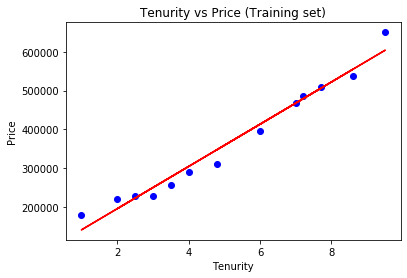

In [20]:
# Visualising the training set results
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.title('Tenurity vs Price (Training set)')
plt.xlabel('Tenurity')
plt.ylabel('Price')
plt.show()

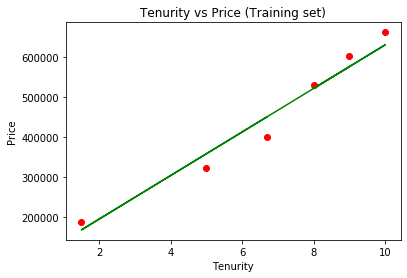

In [21]:
# Visualising the test set results
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='green')
plt.title('Tenurity vs Price (Training set)')
plt.xlabel('Tenurity')
plt.ylabel('Price')
plt.show()

# Mean square error
The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors.

# RMSE

Root mean squared error (RMSE) is the square root of the mean of the square of all of the error. 

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mse = mean_squared_error(y_test, y_pred)

In [24]:
rmse = np.sqrt(mse)

In [25]:
print('MSE = ', mse)
print('RMSE = ', rmse)

MSE =  1029857353.8142715
RMSE =  32091.39064942919


# R2
R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).


In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_test, y_pred)

0.9618595384423422